# MOD300: Assignment 3

**Basel Abu Sablih, Anders Bygdås and Aleksander Bø**

Date: **Oct 27, 2025**


# Introduction

This project estimates the molecular volume of a DNA fragment using a Monte Carlo simulation. The notebook reads atomic coordinates from dna_coords.txt (coordinates provided in Angstrom), assigns each atom a van der Waals radius, converts coordinates to nanometres so all geometric calculations are consistent, builds a tight simulation box that contains the molecule, and estimates the occupied volume by sampling random points and checking whether they fall inside any atomic sphere. Core functions and classes are implemented in dna.py; the notebook calls those helpers and reports convergence, validation checks, and a short discussion.


# Abstract

This notebook presents a Monte Carlo approach to estimate the molecular volume of a DNA fragment from atomic coordinates. We read atom coordinates and assign each atom a van der Waals radius. Coordinates are converted from Angstrom to nanometres so all geometric calculations (box sizes, volumes) are consistent. We estimate the DNA volume by sampling random points uniformly inside a tight simulation box and checking whether each point falls inside any atomic sphere. Results include convergence plots and a short discussion on validation and error estimation.


In [25]:
# Required for updating changes made in dna module
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

# Import required packages
from dna import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# TOPIC 1: Calculate DNA volume via Monte Carlo simulation.


**Task 0**

We define a simulation box in 3d space by specifying its upper bound. Since we are dealing with DNA, we chose to use nanometer as unit.


In [26]:
box = dna.SimulationBox(20,20,20)

**Task 1**


We create a random point inside the simulation box using uniform distribution.


In [27]:
point = dna.create_random_point(box)
point

X 12.88 Y 9.93 Z 9.41

**Task 2**

We use our function for creating an random sphere inside the box.


In [28]:
sphere = dna.create_random_sphere(box)
sphere

X: 11.24 Y: 11.41 Z: 13.54
Radius: 2.49

**Task 3**

We have defined an function that checks if a point is inside an sphere. To check that our function actually works, we manually define two points, one that is at the sphere center (inside point) and one that is just outside the radius (outside point)


In [29]:
point_inside = dna.Point(sphere.center.x, sphere.center.y, sphere.center.z)
point_outside = dna.Point(sphere.center.x + sphere.radius + 1, sphere.center.y, sphere.center.z)

assert sphere.is_point_inside(point_inside), "This point should be inside!"
assert not sphere.is_point_inside(point_outside), "The point should be outside!"

**Task 4**


We estimate the fraction of randomly generated points that are inside a sphere using a Monte Carlo simulation. The simulation generates points uniformly inside the simulation box and counts how many points are contained in the sphere. The fraction is calculated as:

$$
\text{Fraction} = \frac{\text{Number of points inside the sphere}}{\text{Total number of points}}
$$


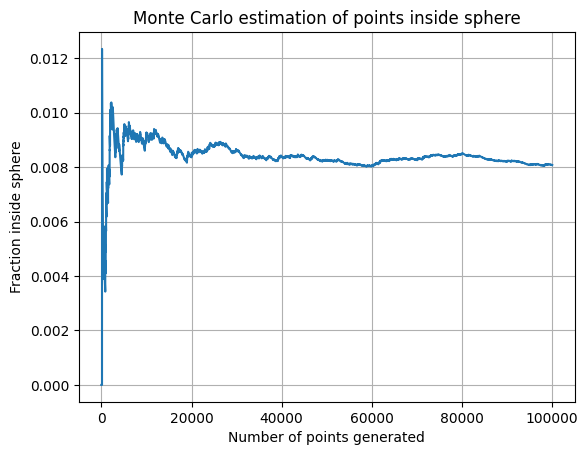

In [30]:
fraction_estimate = dna.monte_carlo_fraction_inside_sphere(sphere, box, plot=True)

We compare the Monte Carlo estimate of the fraction of points inside the sphere with the theoretical expectation. The expected fraction is calculated as the ratio of the sphere’s volume to the simulation box’s volume:


In [31]:
expected_fraction = sphere.get_volume() / box.get_volume()

print("Expected (volume ratio):", expected_fraction)
print("Monte Carlo result:", fraction_estimate)

assert 0.0 <= fraction_estimate <= 1.0, "Monte Carlo fraction must stay within [0, 1]"
assert abs(fraction_estimate - expected_fraction) < 0.02, "Monte Carlo result deviates too much from volume ratio"

Expected (volume ratio): 0.008059359492201022
Monte Carlo result: 0.00808


# Task 5


We estimate π by randomly generating points inside a cube and checking how many end up inside a sphere. The sphere is as big as possible so that more random points will end up inside the sphere and it gives better statistical accuracy.


In [32]:
sample_sizes = [10, 100, 1000, 10000, 100000, 1000000]

box = dna.SimulationBox(20, 20, 20)
sphere = dna.Sphere(dna.Point(10, 10, 10), 10)

for sample_size in sample_sizes:
    print(dna.estimate_pi(sample_size, sphere, box))

3.0
3.06
3.204
3.1512000000000002
3.14808
3.1491299999999995


# Task 6


Generate 10 random spheres in the simulation box


In [9]:
box = dna.SimulationBox(20, 20, 20)

spheres = [dna.create_random_sphere(box) for _ in range(10)]

for i, sphere in enumerate(spheres, 1): 
    print(f"Sphere {i}: {sphere}")

Sphere 1: X: 11.34 Y: 11.54 Z: 8.63
Radius: 7.87
Sphere 2: X: 9.98 Y: 10.01 Z: 9.97
Radius: 9.97
Sphere 3: X: 3.61 Y: 12.16 Z: 1.5
Radius: 0.4
Sphere 4: X: 12.1 Y: 7.1 Z: 6.47
Radius: 6.4
Sphere 5: X: 10.21 Y: 9.94 Z: 10.22
Radius: 7.75
Sphere 6: X: 6.51 Y: 11.25 Z: 9.92
Radius: 6.5
Sphere 7: X: 7.07 Y: 11.85 Z: 2.63
Radius: 1.29
Sphere 8: X: 9.65 Y: 9.22 Z: 10.16
Radius: 9.2
Sphere 9: X: 9.42 Y: 9.75 Z: 10.23
Radius: 9.41
Sphere 10: X: 9.98 Y: 10.07 Z: 9.94
Radius: 9.89


# Task 7


Calculate and plot the fraction of points INSIDE the sphere divided by the number of randomly generated points.


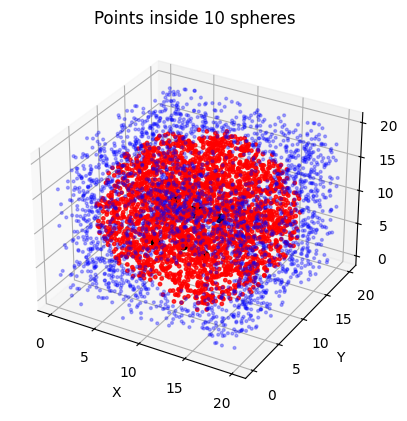

In [10]:
fractions = dna.fraction_inside_sphere(spheres, box, n_points=100_000, plot=True)

assert len(fractions) == len(spheres), "Should get one fraction per sphere"
assert all(0.0 <= f <= 1.0 for f in fractions), "All fractions must be between 0 and 1"

To check if the result is right we compare the Monte Carlo estimate with the theoretical volume ratio, given by the volume of the  
sphere divided by the volume of the box. Since the points are generated uniformly, this ratio represents the expected probability  
that a random point falls inside the sphere.


## Task 8

Read the DNA coordinates file and assign atomic radii to each atom based on the periodic table.


We use van der Waals radii (in Angstroms) for each element to determine the size of each atomic sphere.


In [35]:
atoms = dna.read_and_report('dna_coords.txt')


Total atoms: 259

First 10 atoms:
Atom 1: Element=H, X=-48.18, Y=1.75, Z=-1.22, Radius=0.53 Å
Atom 2: Element=O, X=-48.07, Y=1.26, Z=-0.41, Radius=0.48 Å
Atom 3: Element=P, X=-46.63, Y=1.28, Z=-0.00, Radius=0.98 Å
Atom 4: Element=O, X=-46.41, Y=2.54, Z=0.73, Radius=0.48 Å
Atom 5: Element=O, X=-45.84, Y=1.10, Z=-1.24, Radius=0.48 Å
Atom 6: Element=O, X=-46.38, Y=0.04, Z=0.97, Radius=0.48 Å
Atom 7: Element=C, X=-47.32, Y=-0.21, Z=2.04, Radius=0.67 Å
Atom 8: Element=C, X=-46.59, Y=-0.77, Z=3.24, Radius=0.67 Å
Atom 9: Element=O, X=-46.38, Y=-2.20, Z=3.03, Radius=0.48 Å
Atom 10: Element=C, X=-45.19, Y=-0.22, Z=3.50, Radius=0.67 Å

Atomic radii mapping:
H: 0.53 Å
C: 0.67 Å
N: 0.56 Å
O: 0.48 Å
P: 0.98 Å


# Task 9 & 10 — Simulation box and Monte Carlo DNA volume

we are going to build a tight simulation box around the atoms (units consistent: Angstrom -> nm),
then estimate the DNA volume by Monte Carlo sampling of the union of atomic spheres.


In [ ]:
padding_nm = 0.5
box = dna.generate_atoms_box(atoms, units='angstrom', padding_nm=padding_nm, verbose=True)


Box bounds (nm):
  x: -5.3711 to -2.5243  (size 2.8468 nm)
  y: -2.3251 to 0.8022  (size 3.1273 nm)
  z: -1.5472 to 1.5377  (size 3.0849 nm)
Box volume: 27.464240 nm^3


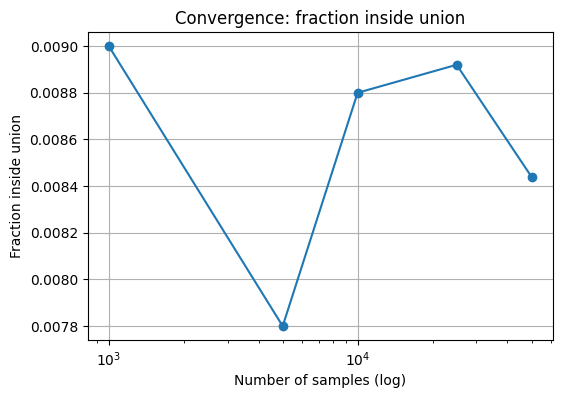

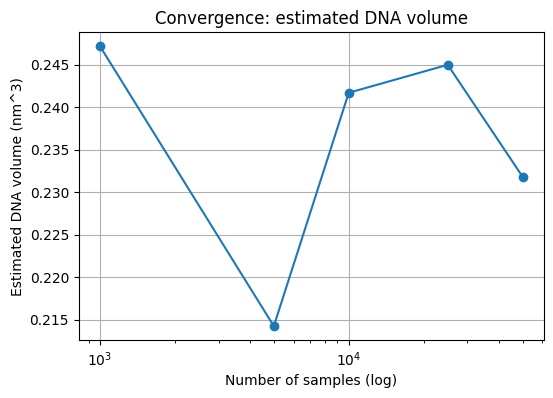

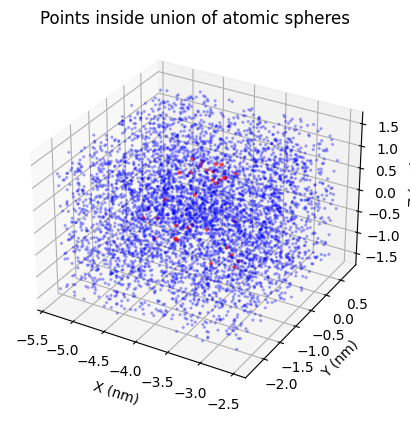

Box volume (nm^3): 27.464240
n=1000 fraction=0.009000 volume(nm^3)=0.247178 (Å^3=247.2)
n=5000 fraction=0.007800 volume(nm^3)=0.214221 (Å^3=214.2)
n=10000 fraction=0.008800 volume(nm^3)=0.241685 (Å^3=241.7)
n=25000 fraction=0.008920 volume(nm^3)=0.244981 (Å^3=245.0)
n=50000 fraction=0.008440 volume(nm^3)=0.231798 (Å^3=231.8)
Sum of individual sphere volumes (upper bound): 0.232509 nm^3 (232.5 Å^3)


In [37]:
sample_sizes = [1000, 5000, 10000, 25000, 50000]
results = dna.estimate_dna_volume_monte_carlo(atoms, sample_sizes=sample_sizes, units='angstrom', padding_nm=padding_nm, plot_convergence=True, plot_3d=True)

print(f"Box volume (nm^3): {results['box_volume']:.6f}")
for n, f, v in zip(results['sample_sizes'], results['fractions'], results['volumes_nm3']):
    print(f"n={n} fraction={f:.6f} volume(nm^3)={v:.6f} (Å^3={v*1000:.1f})")
print(f"Sum of individual sphere volumes (upper bound): {results['sum_sphere_vol']:.6f} nm^3 ({results['sum_sphere_vol']*1000:.1f} Å^3)")

# TOPIC 2: Random walk for accesible volume calculation


Task 1: Make a function to generate a set of random walkers in 3d starting from a set of different random points


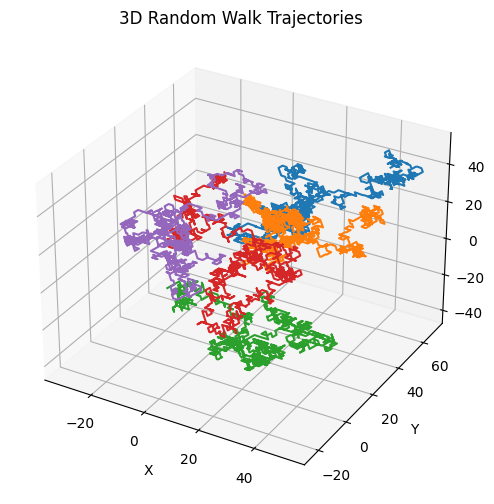

In [38]:
walker = Walker(n_walkers=5, n_steps=1000)
paths_basic = walker.random_walkers()
plot_walkers(paths_basic, show_start_end=False)

Task 2: Make a fast function to generate a set of random walkers in 3d starting from a set of different random points.


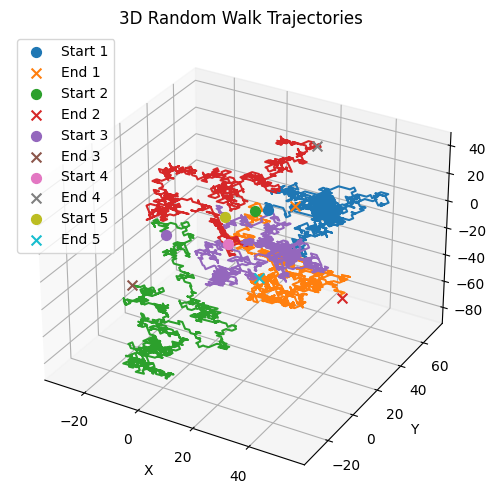

In [39]:
paths_fast = walker.random_walkers_fast()
plot_walkers(paths_fast)

**Task 3**

We can estimate the accessible volume by having random walkers move inside a box. A position is “accessible” if it doesn’t collide with any DNA atom sphere inflated by the probe radius. At each step, we reflect walkers at box walls and reject steps that would go inside an inflated atom sphere. The fraction of visited positions that are accessible gives an estimate of the accessible volume fraction (times the box volume gives the volume). Increasing walkers/steps improves the estimate.


**Task 4**

To test that our strategy is correct we can check simple bounds and convergence: 0 ≤ accessible volume ≤ box volume, and it should decrease when the probe radius gets bigger.


**Task 5**
We use the walker-based function to estimate the accessible volume, then print the fraction and volume so we can reuse the numbers when comparing with other methods later.


In [40]:
probe_radius_nm = 0.14
n_walkers = 200
n_steps = 2000
step_size_nm = 0.02

fraction, volume_nm3, box = dna.estimate_accessible_volume_walkers(
    atoms,
    probe_radius_nm=probe_radius_nm,
    n_walkers=n_walkers,
    n_steps=n_steps,
    step_size_nm=step_size_nm,
    units='angstrom',
    padding_nm=0.5,
)

print(f"Accessible fraction (walkers): {fraction:.6f}")
print(f"Accessible volume (nm^3): {volume_nm3:.6f}")

assert 0.0 <= fraction <= 1.0, "Walker fraction must be within [0, 1]"
assert 0.0 <= volume_nm3 <= box.get_volume(), "Accessible volume must be within box volume bounds"


Accessible fraction (walkers): 0.847272
Accessible volume (nm^3): 23.269696


We use functions that check basic bounds, convergence, and a synthetic single-atom case so we can be confident the walker results make sense.


In [41]:
res = dna.validate_accessible_volume_bounds_and_convergence(atoms)

print("Bounds & convergence results:")
print(f"Box volume (nm^3): {res['box_volume']:.6f}")
print(f"v_small (nm^3): {res['v_small']:.6f} | v_large (nm^3): {res['v_large']:.6f}")
print(f"bounds_ok_small: {res['bounds_ok_small']} | monotonic_ok: {res['monotonic_ok']}")
print(f"v_lo (nm^3): {res['v_lo']:.6f} | v_hi (nm^3): {res['v_hi']:.6f} | rel_change: {res['rel_change']:.2%}")


Bounds & convergence results:
Box volume (nm^3): 27.464240
v_small (nm^3): 24.846074 | v_large (nm^3): 23.239142
bounds_ok_small: True | monotonic_ok: True
v_lo (nm^3): 24.626635 | v_hi (nm^3): 23.891845 | rel_change: 2.98%


# Usage of AI

**Aleksander:** Generate docstrings, explain topics and refactoring code for performance

**Anders:** I used AI to clarify and get better understanding of the tasks, and to write the docstrings.

**Basel:** I used AI to undestand the tasks, and to write the docstrings and modify the plots for a better view


# Contribution

**Aleksander:** Topic 1 (Task 0-6), Topic 2 (Task 3-5)

**Anders:** Topic 1 (Task 6-7), Topic 2 (Task 1-2)

**Basel:** Topic 1(Task 8-10)


# Self-reflection

Basel Abu Sablih:

- What I implemented / tested: I implemented Tasks 8–10: I parsed the provided dna_coords.txt file, assigned van der Waals radii, converted coordinates to consistent units (Å → nm), implemented helpers in dna.py for building a tight simulation box, converting atoms to spheres, and estimating DNA volume with Monte Carlo. I also added notebook calls that run these helpers and produce convergence plots and a small 3D visualization.
- What I found difficult or unclear: Making sure units are handled consistently (Angstrom vs nm) and choosing a box padding that is tight but safe. Also balancing Monte Carlo sample size vs runtime to get stable estimates.

Anders Bygdås:

- What I implemented / tested: I implemented the function fraction_inside_sphere() using the Monte Carlo method. I also generated 10 random spheres with random position (Task 6.) In addition, i created the Walker class for Topic 2, including the methods required for Task 1 and 2. 
- What I found difficult or unclear: I found it unclear how i should handle multiple spheres. 

Aleksander Bø:

- What I implemented / tested: I created the classes such as SimulationBox, Sphere and Point and implemented their methods. I used assert to check that functions were working correctly.
- What I found difficult or unclear: I had issues with performance, were code from Task 5 was taking too long to execute.


# References

(Estimating Pi using the Monte Carlo Method) https://www.101computing.net/estimating-pi-using-the-monte-carlo-method/

(Numpy library) https://numpy.org/doc/stable/user/index.html#user
